In [1]:
#Frame the problem and look at the big picture
#Get the data
#Explore the data to gain insights
#Prepare the data to better expose the underlying data patterns to machine learning algorithms
#Explore many different models and short-list the best ones
#Fine-tune your models and combine them into a great solution
#Present your solution
#Launch, monitor and maintain your system

## Frame the problem and look at the big picture

In this project we are going to train a neural network for image recognition. The dataset we will be using contains .... After we have fine-tuned the model and finished training it, we will deploy it on our web-app. From there you can upload a image of a .... and get the classification of the image. 

We will use Tensorflow with keras for the neural network. 

## Get the data

In [2]:
#Import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\jonas\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jonas\miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\jonas\miniconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [3]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Explore the data to gain insights

In [4]:
#Look at the data types
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
#Get the shape of the arrays
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)
x_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)


In [6]:
#We take a look at the first image
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

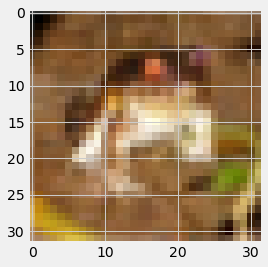

In [7]:
#Show the first row as an image
img = plt.imshow(x_train[index])

Looks like a frog. Lets check if that is correct.

In [8]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is: ', classification[y_train[index][0]])

The image class is:  frog


## Prepare the data to better expose the underlying data patterns to machine learning algorithms

In [9]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
#Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
#Print the new label of the current image above
print('The one hot label is: ', y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [13]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## Explore many different models and short-list the best ones

In [14]:
#Create the models architecture
model = Sequential()

#Add the first layer 
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

#Add a pooling layer
model.add( MaxPooling2D(pool_size= (2,2)) )

#Add another convolution layer
model.add( Conv2D(32, (5,5), activation='relu') ) 

#Add another pooling layer
model.add( MaxPooling2D(pool_size= (2,2)) )

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add another layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add another drop out layer
model.add(Dropout(0.5))

#Add another layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add another layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [15]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [16]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 22s 137ms/step - loss: 1.8261 - accuracy: 0.3164 - val_loss: 1.5225 - val_accuracy: 0.4364
Epoch 2/10
157/157 [==============================] - 21s 135ms/step - loss: 1.4358 - accuracy: 0.4746 - val_loss: 1.3493 - val_accuracy: 0.5064
Epoch 3/10
157/157 [==============================] - 22s 137ms/step - loss: 1.2809 - accuracy: 0.5371 - val_loss: 1.2098 - val_accuracy: 0.5620
Epoch 4/10
157/157 [==============================] - 22s 140ms/step - loss: 1.1821 - accuracy: 0.5780 - val_loss: 1.1615 - val_accuracy: 0.5883
Epoch 5/10
157/157 [==============================] - 23s 144ms/step - loss: 1.0908 - accuracy: 0.6115 - val_loss: 1.0850 - val_accuracy: 0.6177
Epoch 6/10
157/157 [==============================] - 23s 144ms/step - loss: 1.0260 - accuracy: 0.6362 - val_loss: 1.0579 - val_accuracy: 0.6261
Epoch 7/10
157/157 [==============================] - 23s 147ms/step - loss: 0.9731 - accuracy: 0.6555 - val_loss: 0.9848 - val_ac

In [26]:
#Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 2s 5ms/step - loss: 0.9636 - accuracy: 0.6597


0.6596999764442444

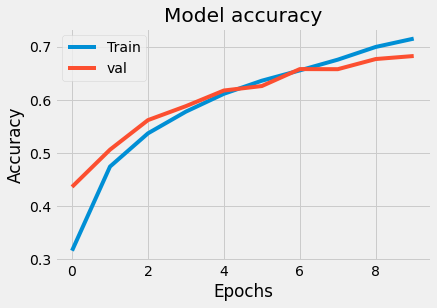

In [27]:
#Vizualise the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

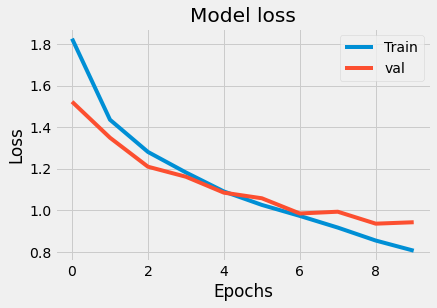

In [28]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'val'], loc='upper right')
plt.show()

In [29]:
#Test the model with an example
#from google.colab import files
#uploaded = import "bird.jpg"

#from PIL import Image
#im  = Image.open("bird.jpg")


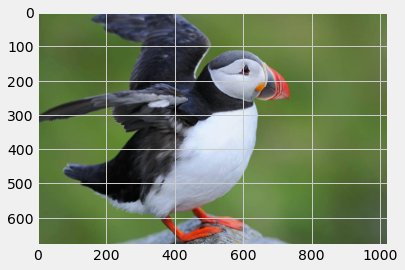

In [30]:
#show the image
new_image = plt.imread("bird.jpg")
img = plt.imshow(new_image)

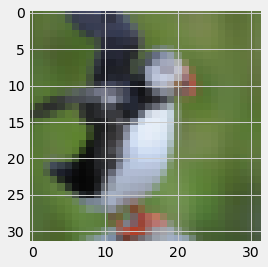

In [31]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [32]:
#Get the models predictions
predictions = model.predict(np.array([resized_image]))

#Show the predictions
predictions

array([[1.2046555e-02, 1.7351824e-04, 1.5917946e-01, 2.7566612e-01,
        8.8669635e-02, 4.1914722e-01, 1.4230144e-02, 2.7122211e-02,
        3.3294030e-03, 4.3565690e-04]], dtype=float32)

In [33]:
#Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Show the sorted labels in order
print(list_index)

[5, 3, 2, 4, 7, 6, 0, 8, 9, 1]


In [34]:
#print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

dog : 41.91 %
cat : 27.57 %
bird : 15.92 %
deer : 8.87 %
horse : 2.71 %


## Fine-tune your models and combine them into a great solution

## Present your solution

## Launch, monitor and maintain your system

  Running setup.py clean for pillow
Failed to build pillow
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.0.1
    Uninstalling Pillow-8.0.1:
      Successfully uninstalled Pillow-8.0.1
    Running setup.py install for pillow: started
    Running setup.py install for pillow: finished with status 'error'
  Rolling back uninstall of Pillow
  Moving to c:\users\jonas\miniconda3\lib\site-packages\pil\__init__.py
   from C:\Users\jonas\AppData\Local\Temp\pip-uninstall-35o0udpc\__init__.py
  Moving to c:\users\jonas\miniconda3\lib\site-packages\pil\__main__.py
   from C:\Users\jonas\AppData\Local\Temp\pip-uninstall-35o0udpc\__main__.py
  Moving to c:\users\jonas\miniconda3\lib\site-packages\pil\__pycache__\
   from C:\Users\jonas\miniconda3\Lib\site-packages\PIL\~_pycache__
  Moving to c:\users\jonas\miniconda3\lib\site-packages\pil\_binary.py
   from C:\Users\jonas\AppData\Local\Temp\pip-uninstall-35o0udpc\_binary.py
  Moving to c:\users\jonas\miniconda3\lib\site-pa

  ERROR: Command errored out with exit status 1:
   command: 'c:\users\jonas\miniconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\jonas\\AppData\\Local\\Temp\\pip-install-5u_acvvq\\pillow\\setup.py'"'"'; __file__='"'"'C:\\Users\\jonas\\AppData\\Local\\Temp\\pip-install-5u_acvvq\\pillow\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\jonas\AppData\Local\Temp\pip-wheel-62aeob41'
       cwd: C:\Users\jonas\AppData\Local\Temp\pip-install-5u_acvvq\pillow\
  Complete output (170 lines):
  Single threaded build for windows
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\PIL
  copying PIL\BdfFontFile.py -> build\lib.win-amd64-3.8\PIL
  copying PIL\BmpImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying PIL